In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [25]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [28]:
df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])
#df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [29]:
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [30]:
if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
sns.set_style("whitegrid")

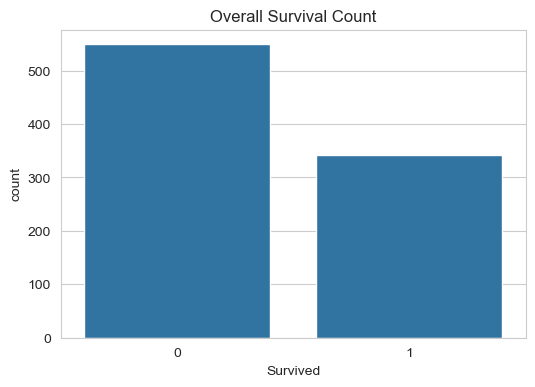

In [33]:
#survival count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived')
plt.title("Overall Survival Count")
plt.show()

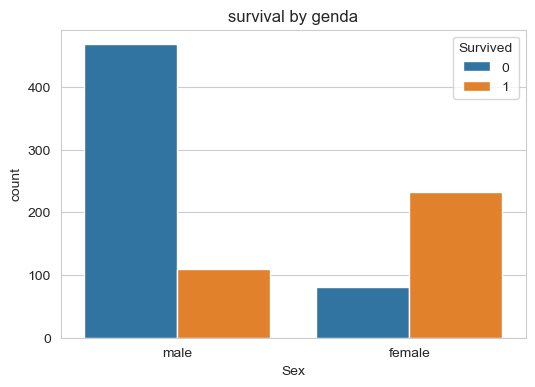

In [36]:
#survival by genda
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("survival by genda")
plt.show()

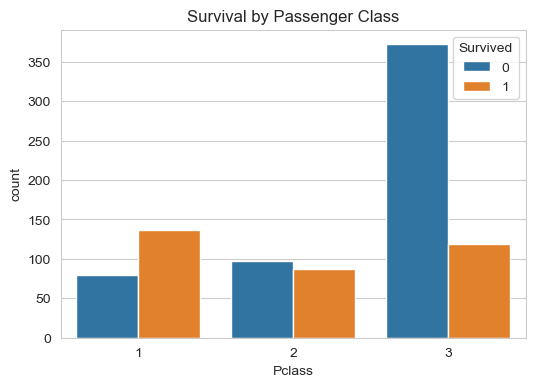

In [37]:
#survival by Passenger class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

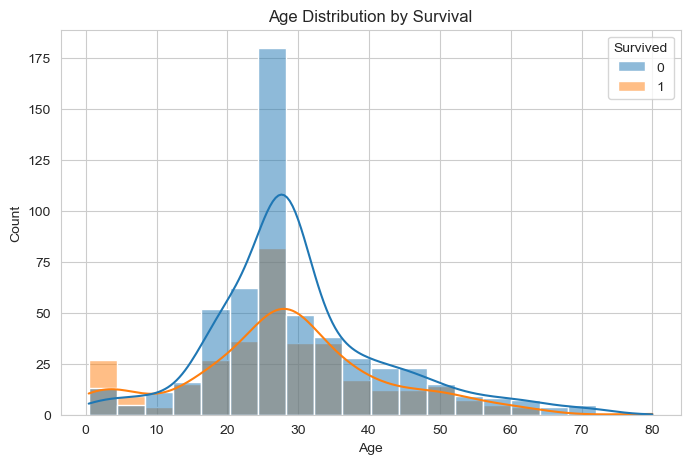

In [40]:
#Age Distribution by survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

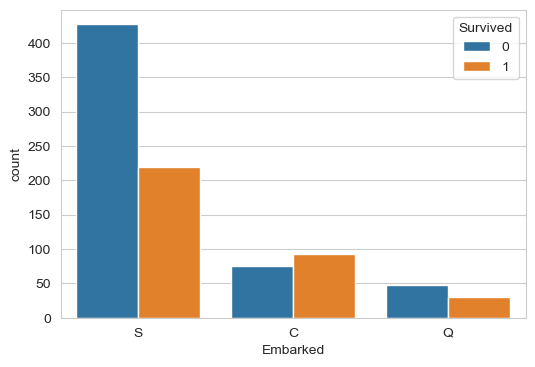

In [41]:
if 'Embarked'in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Embarked', hue='Survived')
    plt.show()

In [44]:
survival_by_gender = df.groupby("Sex")["Survived"].mean() * 100
print("Survival rate by genda (%):")
print(survival_by_gender)

Survival rate by genda (%):
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [45]:
Survival_by_class = df.groupby("Pclass")["Survived"].mean() * 100
print("Survival rate by class (%):")
print(Survival_by_class)

Survival rate by class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [49]:
#survive rate by age group(c & a)
df["AgeGroup"] = df["Age"].apply(lambda x: "Child" if x < 18 else "Adult")
Survival_by_agegroup = df.groupby("AgeGroup")["Survived"].mean() * 100
print("Survival rate by age group (%) : ")
print(Survival_by_agegroup)

Survival rate by age group (%) : 
AgeGroup
Adult    36.118252
Child    53.982301
Name: Survived, dtype: float64
